<a href="https://colab.research.google.com/github/Aqvafor-AI/open-cv/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2216_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

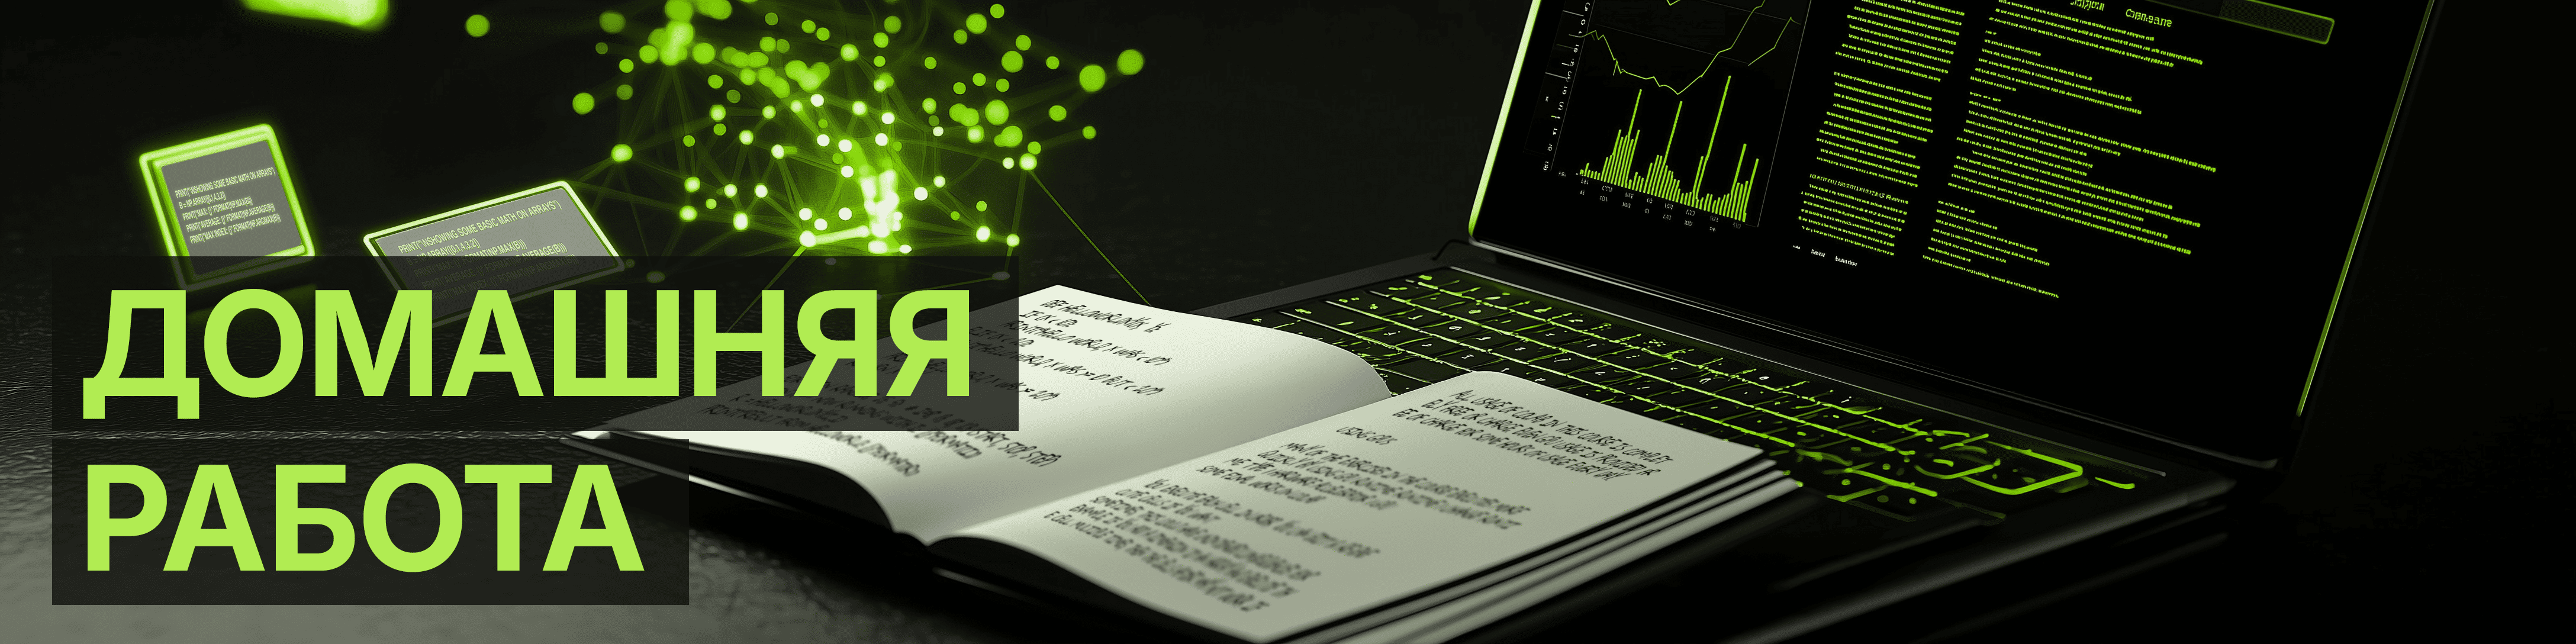

**Навигация по уроку**

1. [Задачи машинного зрения на OpenCV](https://colab.research.google.com/drive/1x1rxbNfV1ft1ztIPwxA3q34J4MULix5A)
2. [OpenCV. Распознавание лиц (практика)](https://colab.research.google.com/drive/1GwMZ8BAjtdKBDA5S0lAX1OPMFmIaYhqL)
3. Домашняя работа


Используя знания из практической части урока и функцию `blur_face` (размытие), проведите следующий эксперимент:
1. Найдите фото любого известного актера или актрисы.
2. Распознайте лицо на фотографии. Выделите лицо овалом. Какой метод для рисования овала использовать, вы должны найти самостоятельно.
3. Выделите на изображении глаза. Выделите их кружком. Если вы чувствуете в себе суперсилу и дополнительный бекграунд знаний, и хотите получить больше баллов за задание, то нарисуйте вместо кружков солнцезащитные очки (картинку очков можно найти в интернете, задача их правильно масштабировать и разместить).
4. Все лицо кроме глаз необходимо "заблюрить" (размыть) с помощью функции `blur_face` (функция объявлена ниже).




Оценка за задание:
* 1 балл - задача решена с помощью куратора, лицо распознано прямоугольником, глаза кругом.
* 2 балла - задача решена с незначительными подсказками куратора, лицо распознано прямоугольником или кругом, глаза кругом, лицо размыто.
* 3 балла - задача решена самостоятельно, лицо распознано овалом, глаза кругом, удалось заблюрить лицо, не затронув глаза.
* 4 балла - задача решена самостоятельно на 3 балла, удалось нарисовать очки с подсказкой куратора, недостаточна соблюдена симметрия расположения очков или недостаточно учтены их размеры.
* 5 баллов - задача полностью решена самостоятельно, все пункты выполнены.

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline

# Функция размытия
def blur_face(img):
    (h, w) = img.shape[:2]
    dw = int(w / 3.0)
    dH = int(h / 3.0)
    if dw % 2 == 0:
        dw -= 1
    if dH % 2 == 0:
        dH -= 1
    return cv2.GaussianBlur(img, (dw, dH), 0)


In [ ]:
# Загрузка изображения из URL
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Deadpool_2_Japan_Premiere_Red_Carpet_Ryan_Reynolds_%28cropped%29.jpg/800px-Deadpool_2_Japan_Premiere_Red_Carpet_Ryan_Reynolds_%28cropped%29.jpg"
resp = urllib.request.urlopen(url)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

# Грейскейл-версия для распознавания
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
# скачиваем через wget
!wget https://pngimg.com/uploads/glasses/glasses_PNG54244.png -O glasses.png


--2025-05-17 09:48:07--  https://pngimg.com/uploads/glasses/glasses_PNG54244.png
Resolving pngimg.com (pngimg.com)... 104.26.4.108, 172.67.75.130, 104.26.5.108, ...
Connecting to pngimg.com (pngimg.com)|104.26.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31828 (31K) [image/png]
Saving to: ‘glasses.png’

glasses.png         100%[===================>]  31.08K  --.-KB/s    in 0.01s   

2025-05-17 09:48:08 (2.86 MB/s) - ‘glasses.png’ saved [31828/31828]



In [ ]:
# загружаем с альфа-каналом
glasses_png = cv2.imread("glasses.png", cv2.IMREAD_UNCHANGED)


In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


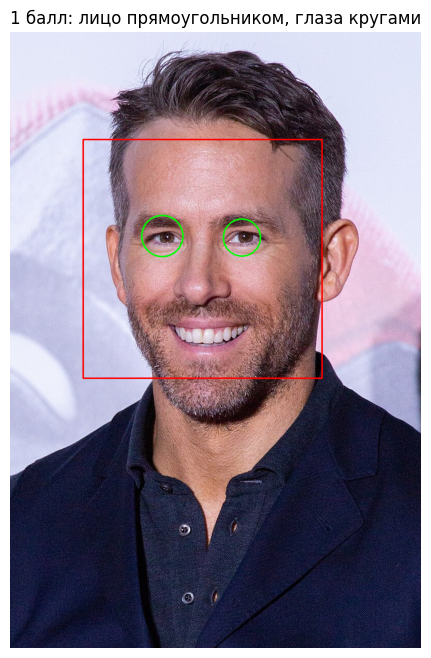

In [ ]:
# Рисуем фигуры: лицо — прямоугольник, глаза — круги, без размытия
img1 = img.copy()

# находим лица
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(80, 80)
)

for (x, y, w, h) in faces:
    # рисуем прямоугольник вокруг лица
    cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # ищем глаза внутри этого лица
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex, ey, ew, eh) in eyes:
        # центр и радиус круга
        center = (x + ex + ew//2, y + ey + eh//2)
        radius = int(round((ew + eh) * 0.25))
        # рисуем кружок
        cv2.circle(img1, center, radius, (0, 255, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('лицо прямоугольником, глаза кругами')
plt.show()


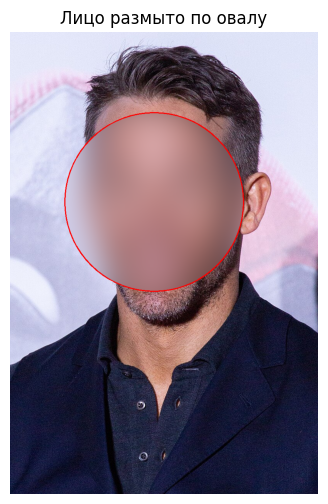

In [ ]:
# Рисуем круг и размываем лицо

# Предполагаем, что img и gray уже есть, а каскады загружены
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(80, 80))

# Для наглядности работаем только с первым лицом
x, y, w, h = faces[0]
center_face = (x + w//2, y + h//2)
axes = (w//2, h//2)

# Создаём маску и рисуем в ней круг
mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.ellipse(mask, center_face, axes, 0, 0, 360, 255, -1)

# Применяем размытие по маске
blurred = blur_face(img)
img_blurred = np.where(mask[:, :, np.newaxis]==255, blurred, img)

# Рисуем контур круга красным поверх заблюренного лица
cv2.ellipse(img_blurred, center_face, axes, 0, 0, 360, (0, 0, 255), 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Лицо размыто по кругу')
plt.show()


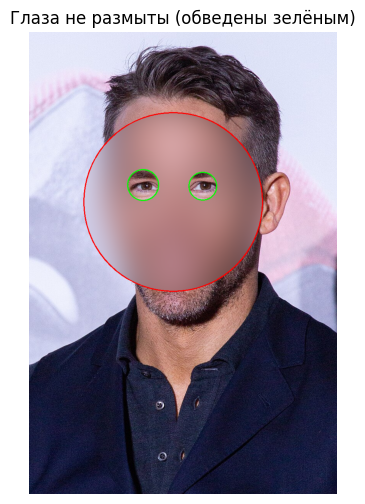

In [ ]:
# Рисуем на маске кружки глаз, чтобы увидеть, что они не размыты

# Снова строим маску с овалом
mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.ellipse(mask, center_face, axes, 0, 0, 360, 255, -1)

# Ищем глаза в ROI лица
roi_gray = gray[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)

# Вырезаем каждый глаз из маски
for (ex, ey, ew, eh) in eyes:
    ec = (x + ex + ew//2, y + ey + eh//2)
    r  = int(round((ew + eh)*0.25))
    cv2.circle(mask, ec, r, 0, -1)   # затираем кружком в маске

# Применяем размытие по новой маске
img_part = np.where(mask[:, :, np.newaxis]==255, blurred, img)

# Рисуем красный контур эллипса поверх заблюренного лица
cv2.ellipse(img_part, center_face, axes, 0, 0, 360, (0, 0, 255), 2)

# Отрисуем кружки для визуализации
for (ex, ey, ew, eh) in eyes:
    ec = (x + ex + ew//2, y + ey + eh//2)
    r  = int(round((ew + eh)*0.25))
    cv2.circle(img_part, ec, r, (0,255,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_part, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Глаза не размыты (обведены зелёным)')
plt.show()


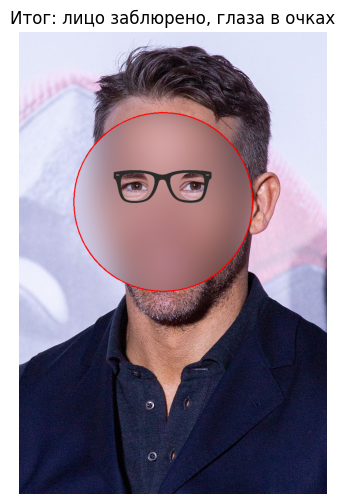

In [ ]:
# Окончательная вариант: овальный blur + очки

# Начинаем с img (исходник) и маски
result = np.where(mask[:, :, np.newaxis]==255, blurred, img)

# Рассчитываем центры глаз и расстояние
eyes_sorted = sorted(eyes, key=lambda e: e[0])
ex1, ey1, ew1, eh1 = eyes_sorted[0]
ex2, ey2, ew2, eh2 = eyes_sorted[1]
eye1 = (x+ex1+ew1//2, y+ey1+eh1//2)
eye2 = (x+ex2+ew2//2, y+ey2+eh2//2)
mid_x = (eye1[0]+eye2[0])//2
mid_y = (eye1[1]+eye2[1])//2
eye_dist = abs(eye2[0]-eye1[0])

# Масштабируем очки
scale = 2.0
w_new = int(eye_dist*scale)
h_new = int(w_new * (glasses_png.shape[0]/glasses_png.shape[1]))
gl = cv2.resize(glasses_png, (w_new, h_new), interpolation=cv2.INTER_AREA)

# Вставляем очки с альфой
tlx = mid_x - w_new//2
tly = mid_y - h_new//2
for i in range(h_new):
    for j in range(w_new):
        y0 = tly + i
        x0 = tlx + j
        if 0<=x0<result.shape[1] and 0<=y0<result.shape[0]:
            a = gl[i,j,3]/255.0
            if a>0:
                for c in range(3):
                    result[y0,x0,c] = a*gl[i,j,c] + (1-a)*result[y0,x0,c]

# Рисуем красный контур эллипса поверх заблюренного лица
cv2.ellipse(result, center_face, axes, 0,0,360,(0,0,255),2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Итог: лицо заблюрено, глаза в очках')
plt.show()
